# HYPOTHESIS TESTING: THEORY

### Definition

**Hypothesis testing** is the process of testing an **assumption** regarding a **parameter** of a **population** using a **sample** of the population.

# 1. Example: Verifying a model for the mass of globular clusters (GC)

## 1.1 The theoretical model

*Globis & Clusterton (2022)* used hydrodynamical galaxy simulations to model the formation of globular clusters (GC) in a galaxy like the Milky Way. They found that the masses of the GC are described by a Gaussian distribution:

$$ \large \log_{10} \frac{M}{M_\odot} \sim N\left( 5.5, 1.0 \right)$$

meaning that the mean mass is $10^{5.5}\,M_\odot \simeq 3.2 \times 10^5\,M_\odot$ and the typical scatter is $1\,\rm dex$ (or an order of magnitude).

Let's see this distribution...

<IPython.core.display.Javascript object>


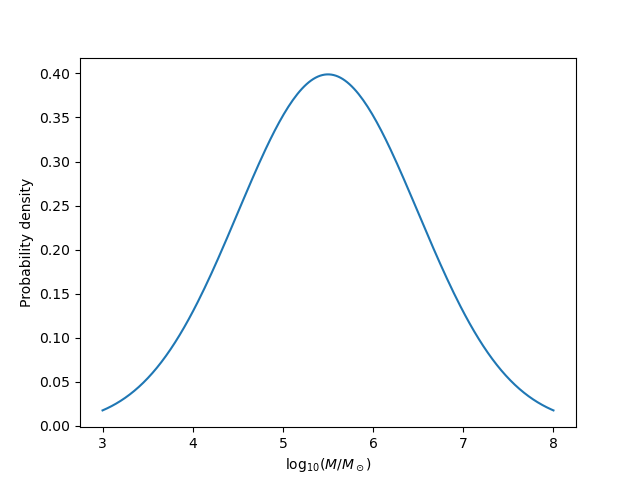

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib notebook

logm_label = "$\log_{10}(M/M_\odot)$"

model_mean = 5.5
model_std = 1.0

model_distribution = st.norm(model_mean, model_std)

x_plot = np.linspace(3.0, 8.0, 200)
y_plot = model_distribution.pdf(x_plot)

plt.figure()
plt.plot(x_plot, y_plot)
plt.xlabel(logm_label)
plt.ylabel("Probability density")
plt.show()

How can we test whether their model is a good approximation of the reality?

## 1.2 Checking against observations
- The mass of GCs can be estimated using the K-band magnitudes (near infrared, 2MASS) of GCs.
- We use a sample of GC in the Milky Way for the comparison [1].
- We test the hypothesis that the mean value is the same. 

Let's load a sample of absolute magnitudes from 81 GCs in our galaxy...

<IPython.core.display.Javascript object>


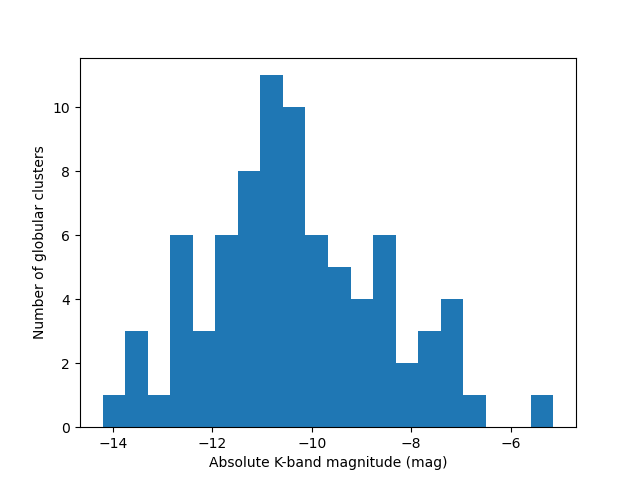

In [2]:
K_absolute_magnitudes = np.genfromtxt("data/GC_MWG_absolute.csv")
sample_size = len(K_absolute_magnitudes)

plt.figure()
plt.hist(K_absolute_magnitudes, bins=20)
plt.xlabel("Absolute K-band magnitude (mag)")
plt.ylabel("Number of globular clusters")
plt.show()

## 1.3 Converting the magnitudes to masses

We first convert the absolute magnitudes to luminosities, and then using the mass-to-light (M/L) ratio, to masses.

<IPython.core.display.Javascript object>


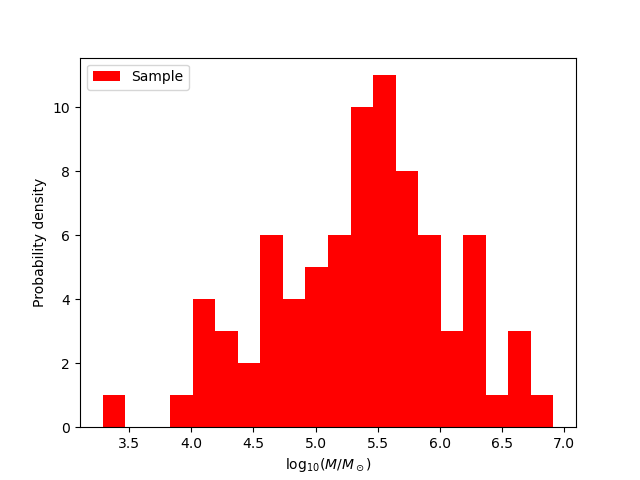

<IPython.core.display.Javascript object>


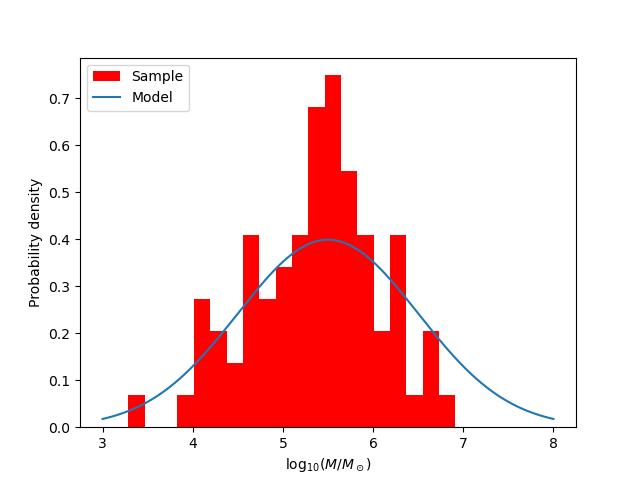

In [3]:
mean_mass_to_light_ratio = 0.822                     # Kovlakas et al. 2021
M_K_solar = 3.29                                     # Blanton & Roweis (2007)
K_band_luminosity = 10.0 ** (
    0.4 * (M_K_solar - K_absolute_magnitudes))       # compute the K-band luminosity (in solar units)
mass = mean_mass_to_light_ratio * K_band_luminosity  # compute the masses using the M/L ratio
log_mass = np.log10(mass)

plt.figure()
plt.hist(log_mass, bins=20, color="r", label="Sample")
plt.xlabel(logm_label)
plt.ylabel("Probability density")
plt.legend(loc="upper left")
plt.show()

plt.figure()
plt.hist(log_mass, bins=20, density=True, color="r", label="Sample")
plt.plot(x_plot, y_plot, label="Model")
plt.xlabel(logm_label)
plt.ylabel("Probability density")
plt.legend(loc="upper left")
plt.show()

## 1.4 What is the mean value and standard deviation of the masses in the sample? 

The most prominent characteristic is the peak around 5.5. This value should agree between the data and a model describing it. But does it?

In [4]:
sample_mean = np.mean(log_mass)
sample_std = np.std(log_mass)
print(sample_mean, sample_std)

print(f"MODEL:  Mean = {model_mean:.2f} | Std = {model_std:.2f}")
print(f"SAMPLE: Mean = {sample_mean:.2f} | Std = {sample_std:.2f}")

5.360313792848693 0.7169575986333317
MODEL:  Mean = 5.50 | Std = 1.00
SAMPLE: Mean = 5.36 | Std = 0.72


#### Question 1: is it **close** to the theoretical value?
#### Question 2: does the standard deviation give a sense of how close the mean values are?

## 1.5 Standard error of the mean

Whether the mean values are close depends also on the sample size. The larger it is, the more accurate our estimate on the mean is, so we would expect to converge to the mean of the underlying population. 

For normally distributed data the **standard deviation of the mean** scales as:

$$ \large \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} $$

where $\sigma_{x}$ is the population standard deviation and $N$ is the sample size.

In most cases, the population deviation is unknown. For this reason, we use the same sample to estimate it, calculating the *sample standard deviation $s$*. The equivalent quantity is called **standard error on the mean**:

$$ \large s_{\bar{x}} = \frac{s}{\sqrt{N}} $$

The sample mean is considered to be normally distributed, and therefore we can calculate the number of standard errors the sample mean is away from the theoretical value, or the **sigmas**.

Standard error of the mean = 0.08
Sigma's of difference      : 1.74


<IPython.core.display.Javascript object>


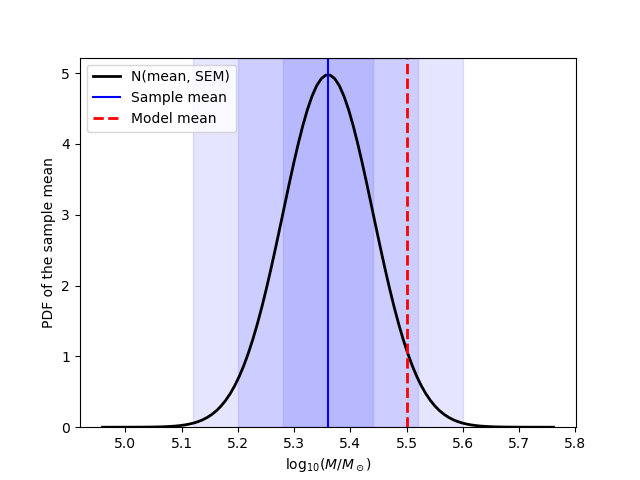

In [5]:
sample_sem = st.sem(log_mass)
print(f"Standard error of the mean = {sample_sem:.2f}")
print(f"Sigma's of difference      : {(model_mean-sample_mean) / sample_sem:.2f}")

x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)
mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)
plt.figure()
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, SEM)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
for sigmas in [1, 2, 3]:
    plt.axvspan(sample_mean - sigmas*sample_sem, sample_mean + sigmas*sample_sem, color="b", alpha=0.1)
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel(logm_label)
plt.ylabel("PDF of the sample mean")
plt.show()

But is this difference small enough to accept the model? 

## 1.6 When to reject a model...

One might argue that if the theoretical mean is too extreme, either **too low** or **two high**, we should **reject the hypothesis theat the model describes the data**. 

Therefore we can calculate from the distribution what is the probability of such extreme values around the sample mean.

<IPython.core.display.Javascript object>


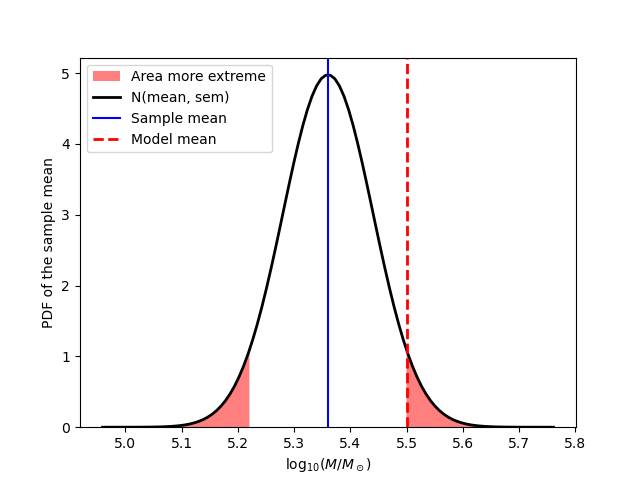

In [6]:
x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)

diff = abs(sample_mean - model_mean)
xx_before = np.linspace(sample_mean - 5 * sample_sem, sample_mean - diff, 100)
xx_after = np.linspace(sample_mean + diff, sample_mean + 5 * sample_sem, 100)

mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)

plt.figure()
plt.fill_between(xx_before, mean_distribution.pdf(xx_before), 0, color="r", ec="none", alpha=0.5, label="Area more extreme")
plt.fill_between(xx_after, mean_distribution.pdf(xx_after), 0, color="r", ec="none", alpha=0.5)
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, sem)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
# for sigmas in [1, 2, 3]:
#     plt.axvspan(sample_mean - sigmas*sample_sem, sample_mean + sigmas*sample_sem, color="b", alpha=0.1)
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel(logm_label)
plt.ylabel("PDF of the sample mean")
plt.show()

The cumulative distribution function is

$$ \large F(x) = \int\limits_{-\infty}^{x} f(x') dx' $$
and therefore the "area more exteme" is the probability 

$$
\begin{align}
\large p   
    &= \large 1 - \textrm{(area between)} = \\
    &= 1 - \int\limits_{m-d}^{m+d} f(x') dx' = \\
    &= 1 - \left(\int\limits_{-\infty}^{m+d} f(x')dx' - \int\limits_{\infty}^{m-d} f(x')dx' \right) = \\
    &= \large 1 - \left[F(m+d) - F(m-d)\right]
\end{align}
$$

which in our case is...

In [7]:
print("Area more extreme, p = {:.3f}".format(
    1 - (mean_distribution.cdf(sample_mean+diff) - mean_distribution.cdf(sample_mean-diff))))

Area more extreme, p = 0.081


In other words, there is an 8% probability to reject this model even if it is correct. *Can we risk it*? It is **our choice** to consider our "threshold"!

If we had decided **before looking at the data** to use a 5% threshold, then our conclusion is that 

> *we do not reject the model, with a significance level of 5%".*

Notice that we **do not accept** the model!!! There are infinite other models under which the $p$-value above will be above our threshold. For example, $N(5.5, 0.101)$, $N(5.51, 0.1)$, ...

on the other hand, if we had found $p=0.0001$ or our threshold was 0.01%, then we would **reject the model** given the sample at hand.

There is no rule on what the significance level should be. Just that is should be decided before looking at the data, to avoid **as humans, bias our conclusions by relaxing our criteria for models we like, or making them harder for models we don't!**

In disciplines that are characterized by inaccuracies or complexities, it is often 1, 5, or 10%. In precision experiments in nuclear physics, often $10^{-7}$ or $10^{-10}$ is used!

Since the $p$-value is connected to the difference's number of sigmas, often we refer the *sigmas* instead of the actual probability - it is shorter to say, and it is easier to "imagine" it in plots with error bars and distributions. For example:

| Sigmas | Probability (inside) | Probability (outside) |
| --- | --- | --- |
|  1 | 0.68 | 0.32 |
|  2 | 0.954 | 0.046 |
|  3 | 0.9973 | 0.0027 |
|  5 | 0.9999994 | 0.0000006 |
|  8 | 0.9999999999999987 | 0.0000000000000013

# 2. In the language of Statistics: *Hypothesis testing*

> **Step 1**: We define the **null hypothesis** or the statement that we will test (a model or random outcome)

> **Step 2**: We decide on a **significance level** - or what is the "probability for being wrong in rejecting the null hypothesis" which we are comfortable with?

> **Step 3**: The **statistic** - or a quantitiy that is computed on our *sample* assuming the *hypothesis is true*

> **Step 4**: **$p$-value** and **critical value**: compute the "probability of being wrong" or the value of the statistic based on which we will reject the hypothesis or not

> **Step 5**: the decision!


### Step 1. We define the null hypothesis

> $H_0$: the mean value of the absolute magnitude of the Milky Way GCs is consistent with model

### Step 2. We decide on a significance level

This is the probability for rejecting the null hypothesis if it is true - the "probability of being wrong" if we reject the hypothesis at the end.

> Let's take a significance level of $5\%$, i.e. $a = 0.05$

### Step 3. The statistic, $Z$-score

In order to decide whether the sample mean is consistent with the model's prediction, we must compute the **distribution of the sample mean given that the model is correct.**

For $N$ observations $x_i$ the sample mean, $\bar{x}$ is

$$ \bar{x} = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

For normally distributed observations, $x_i \sim \mathcal{N}(\mu, \sigma)$, it is known that the sample mean is also normally distributed with mean equal to the population mean ($\mu$) and standard deviation equal to the population standard deviation ($\sigma$) devided by the square root of the size of the sample ($N$):

$$ \bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$$

...called *standard deviation of the mean*:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$

Therefore the probability density function (PDF) of the sample mean is:

$$f(\bar{x}) = \frac{1}{\sqrt{2\pi \ \sigma_{\bar{x}}^2}} \exp\left[-\frac{\left(\bar{x} - \mu\right)^2}{2 \ \sigma_{\bar{x}}}\right]$$

Because of the ability to shift and scale the normal distribution, the quantity

$$ Z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}} $$

follows the standard normal distribution (i.e. mean value $0$ and standard deviation $1$):

$$ f(Z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}Z^2}$$

Therefore, by just computing the $Z$ *score* of our sample, $z$, we can easily use tables for the normal distribution or code to quickly compute the probability at which $Z$ is below or above a specific value.

We call this value $Z$ *statistic* or *score* and it used whenever the quantity we use to test the hypothesis is normally distributed.

### Step 4. $p$-value and critical value(s) for the statistic

<figure>
 <img src="images/two_tailed.png" alt="" width=500 />
 <figcaption>
 <center>Distribution of the statistic and critical values.</center>
 </figcaption>
</figure>

Because of the null hypothesis, we must convert the statement "*consistent with...*" to a mathematical statement. In this example, we can consider that the sample mean is inconsistent with the model prediction if its significantly lower or higher (see *two tail test* instead of *one tail test*).

Therefore, the Type I error is equal to probability that the $Z$ score deviates more than the absolute deviation of the score for the sample at hand:

$$ p = P(Z > |z|) + P(Z < -|z|) $$

Using the symmetry of normal distribution's PDF and the fact that $P({\rm A}) + P({\rm not\ A}) = 1$, we arrive at

$$ p = \cdots = 2 \left(1 - P\left(Z < |z|\right)\right) = \cdots = 2 P(Z < -|z|)$$

or simply,

$$ p = 2 \Phi(-|z|) $$

where $\Phi(z)$ is the CDF of the standard normal distirbution.

If we find $p < a = 0.05$ then we reject the null hypothesis.

Alternatively, we can set **critical** values of the $Z$ score that correspond to the significance level of choice. As rejection should occur either for higher or lower values (two-tailed test), we find two critical values corresponding to $a/2$ probability:

$$ Z_{\rm crit,1} = \Phi^{-1}\left(\frac{a}{2}\right) = -1.96 $$

$$ Z_{\rm crit,2} = \Phi^{-1}\left(1 - \frac{a}{2}\right) = +1.96 $$

Because of the symmetry of the normal distribution we could also compute a critical value for the absolute $Z$ score:

$$ |Z|_{\rm crit} = 1.96 $$

This is equivalent to asking *how many **sigmas** away from the model prediction can the measured value be in order to reject the null hypotheis?* Astronomers are used to use the $\sigma$ term: "we reject the hypothesis on a $2\sigma$ significance level!"

### Step 5. Decision

Now that we defined all the steps, we can apply it on the data. In the following code, we plot the sample, compute the statistic and print the outcome based on $p$-value! Alternatively we can use the critical value.

## 2.1 Let's do that with code!

In [8]:
# set alpha and compute the critical value(s)
alpha = 0.05
print("Significance level: {:7.3f}".format(alpha))

# compute the p-value and report the result
sample_mean = np.mean(log_mass)
standard_error = model_std / (sample_size ** 0.5)
z_score = (sample_mean - model_mean) / standard_error
pvalue = 2 * st.norm(0, 1).cdf(-abs(z_score))

print("Sample mean       : {:7.3f}".format(sample_mean))
print("Standard error    : {:7.3f}".format(standard_error))
print("Sample Z score    : {:7.3f}".format(z_score))
print()
print("p-value           : {:7.3g}".format(pvalue))

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    
print()

# alternatively we could compute the critical value and base our outcome on it
z_critical = abs(st.norm.ppf(alpha / 2.0))
print("Critical values   : {:7.3f} and {:.3f}".format(-z_critical, z_critical))
if abs(z_score) > abs(z_critical):
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")

Significance level:   0.050
Sample mean       :   5.360
Standard error    :   0.111
Sample Z score    :  -1.257

p-value           :   0.209
    ...we cannot reject the null hypothesis. ****

Critical values   :  -1.960 and 1.960
    ...we cannot reject the null hypothesis. ****


## 2.2 Student's $t$-test vs. $Z$-test (above)

Above we used the theoretical value of $\sigma$ to calculate the $Z$-score. We **assumed** that we know the standard deviation of the population! In most cases, we don't!

Instead, we **estimate** the population parameter $\sigma$ from the standard deviation in the sample $s$.

*Caveat: we are using the sames value to calculate the mean and the standard deviation - therefore there is one less degree of freedom in the statistic*:

$$ \large \text{dof} = n - 1 $$

> Is the mean value of a sample equal to the population mean (without knowing the population standard deviation)?

The distribution of the sample mean now follows the Student's $t$-distribution (after applying a shift and a rescale)

Specifically, the statistic is

$$ \large t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

where $s$ is the sample standard deviation and takes the place of the population standard deviation in the $Z$-test we saw previously. The $t$-distribution is similar to the Gaussian but has 'heavier' tails when the sample size is small ($n$):

<IPython.core.display.Javascript object>


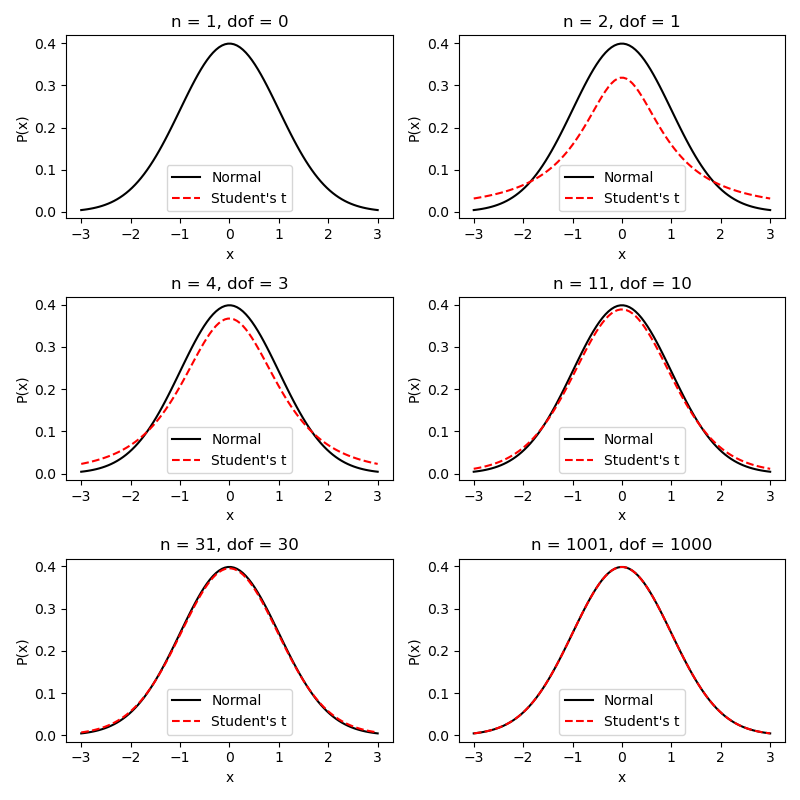

In [9]:
x = np.linspace(-3, 3, 100)                 # x-axis values...
pdf_normal = st.norm.pdf(x)                 # ...and the standard normal PDF at those
degrees_of_freedom = [0, 1, 3, 10, 30, 1000]         # four degrees of freedom to plot

plt.figure(figsize=(8, 8))
for subplot_index, dof in enumerate(degrees_of_freedom):
    pdf_student = st.t.pdf(x, dof)          # Student's t-distribution PDF (for this dof)
    plt.subplot(3, 2, subplot_index + 1)
    plt.title("n = {}, dof = {}".format(dof+1, dof))
    plt.plot(x, pdf_normal, "k-", label="Normal")
    plt.plot(x, pdf_student, "r--", label="Student's t")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.legend(loc="best")
    
plt.tight_layout()
plt.show()

**Question: what happens for $n=1$?**

Let's try the t-Student test in our sample:

In [10]:
statistic, pvalue = st.ttest_1samp(log_mass, model_mean)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = -1.74
p-value   = 0.0852


The $p$-value is smaller because we now use the sample standard deviation (which is smaller than the model's). Otherwise, the heavy tails of the t-Student distribution would result to larger $p$-values for the same $Z$-scores.

## For more information
* Student's t-test is just an example. There are multiple test for diffeent types of distributions, and for different population parameters. 
* Some tests are coming with their two-sample versions. For example, with the **two-sample $t$-test** we can test whether two samples have the same mean.

# 3. The distribution of mean values

In the above example we assumed that the mean of the sample is normally-distributed, i.e. following the Gaussian distribution. This is often the case, at least with some approximation due to the **Central Limit Theorem**:

> the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger, no matter what the shape of the population distribution.

Let's take the *arcsine* distribution which does not look like a Gaussian at all...

<IPython.core.display.Javascript object>


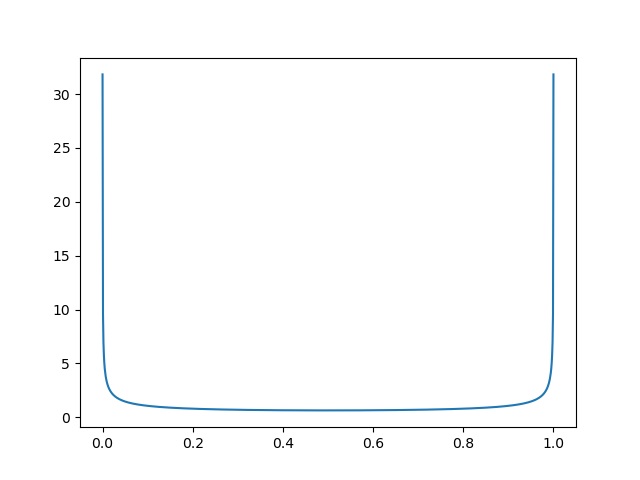

In [11]:
distribution = st.arcsine()
xx = np.linspace(0.0001, 1.0-0.0001, 1000)
plt.figure()
plt.plot(xx, distribution.pdf(xx))
plt.show()

![...](images/thats-just-not-normal.jpg)

<IPython.core.display.Javascript object>


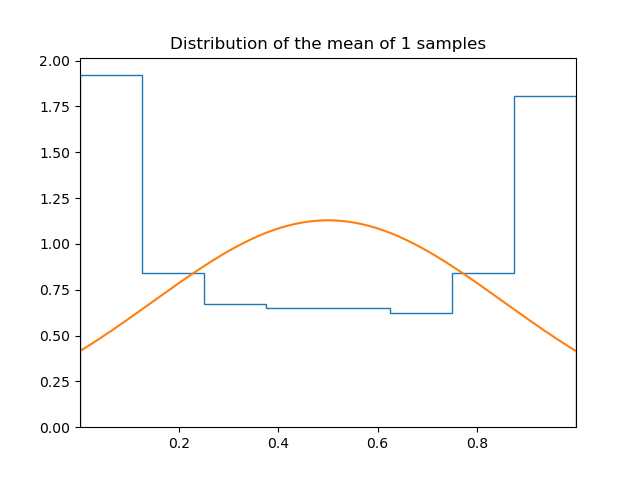

<IPython.core.display.Javascript object>


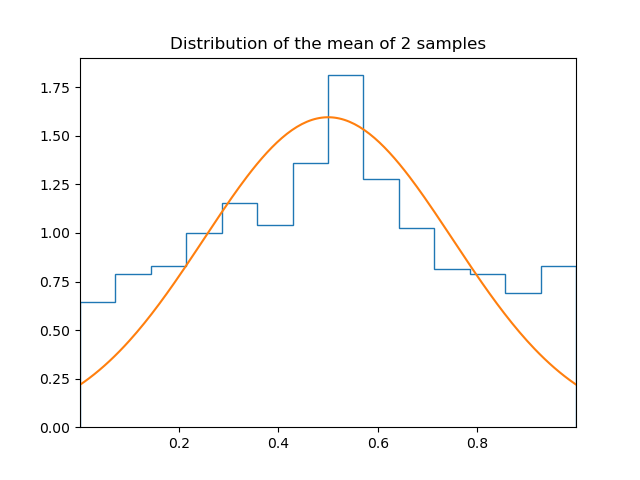

<IPython.core.display.Javascript object>


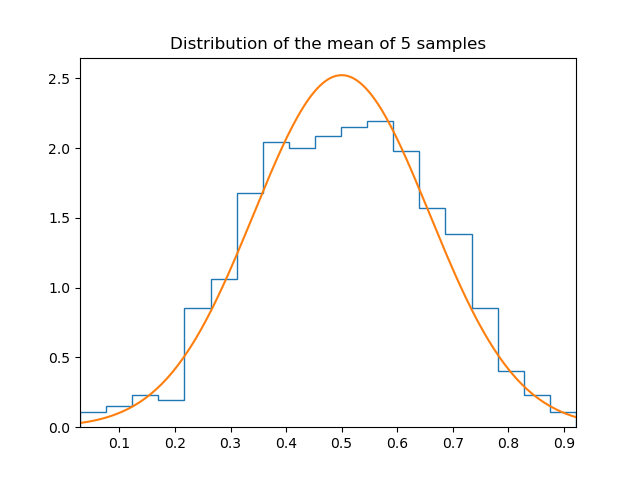

<IPython.core.display.Javascript object>


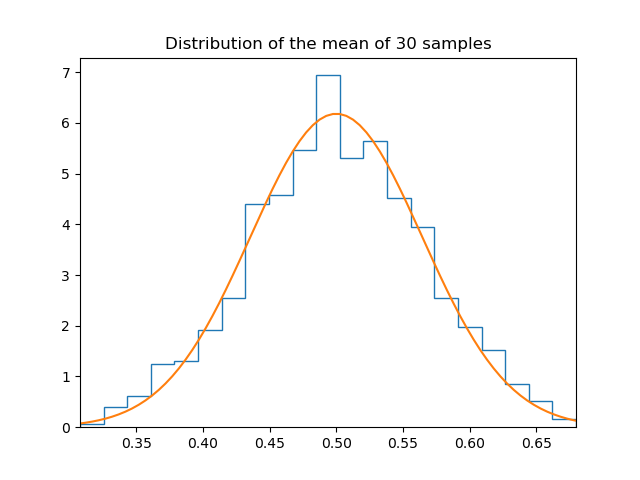

<IPython.core.display.Javascript object>


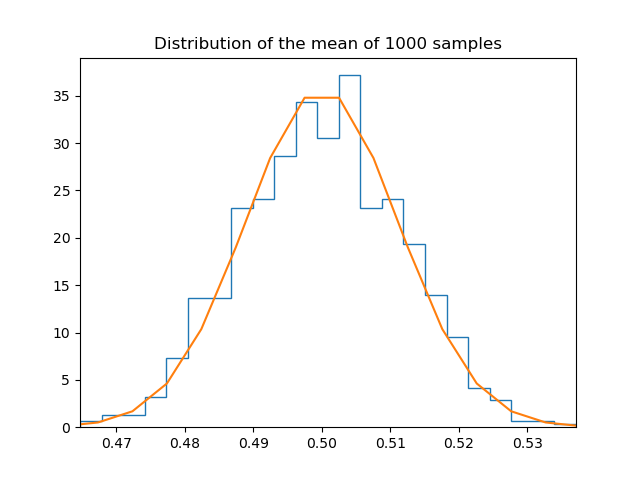

In [12]:
samplings_of_mean = 1000
sample_sizes = [1, 2, 5, 30, 1000]
xx = np.linspace(0.0, 1.0, 200)

for sample_size in sample_sizes:
    plt.figure()
    plt.title(f"Distribution of the mean of {sample_size} samples")
    sample_means = [np.mean(distribution.rvs(size=sample_size)) for _ in range(samplings_of_mean)]
    plt.hist(sample_means, bins="fd", histtype="step", density=True)
    plt.plot(xx, st.norm.pdf(xx, distribution.mean(), distribution.std() / sample_size**0.5))
    plt.xlim(min(sample_means), max(sample_means))
    plt.show()

In practice, for most distributions, we can assume that the mean of a $n>30$ sample is normally-distributed. 

# 4. Distribution tests
## 4.1 Normality test
Above we used our eyes to see the validity of the Central Limit Theorem. But are eyes, and our choice (on bin sizes) may play tricks. Instead, we can test whether a sample follows a known distribution.

In addition, in the hypothesis test at the begin of the session, we assumed that the data are normally distributed, as well as their mean.

When our analysis depends on the "normality" of a distribution, it is better the perform a hypothesis test for exactly that - a **noramlity test**!

Here we use the **Shapiro-Wilk test for normality** (but it's not the only one out there) to test whether the log-masses of the GCs are following the normal distribution.

We **always have to ask which one is the null hypothesis test when using them as a black box**. For Shapiro-Wilk is:

>  $H_0$: the sample came from a normally distributed population

In [13]:
statistic, pvalue = st.shapiro(log_mass)
print("p-value   = {:.3g}".format(pvalue))

p-value   = 0.675


## 4.2 Arbitrary distribution test: the K-S test
Note that a normality test, is very specific to the distribution we check against (Gaussin), but not it's parameters. To check for agreement with any distribution, the **Kolmogorov-Smirnov** test can be used.

> $H_0$: the sample is drawn from the reference distribution

Let's try to test wether the GC sample "agrees" with the theoretical prediction:

<IPython.core.display.Javascript object>


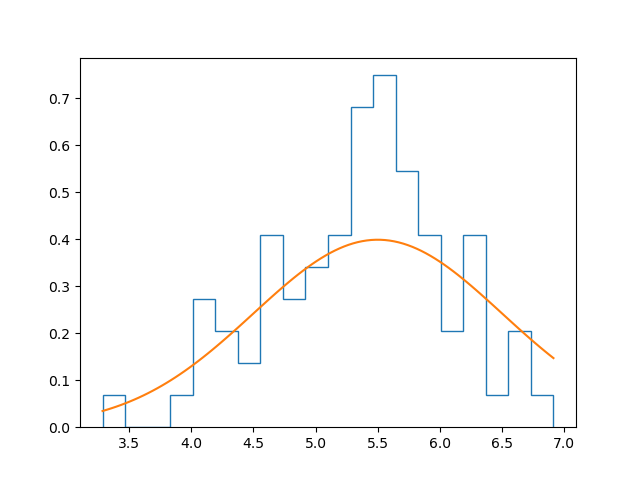

In [14]:
xx = np.linspace(min(log_mass), max(log_mass), 100)
plt.figure()
plt.hist(log_mass, bins=20, histtype="step", density=True)
plt.plot(xx, st.norm.pdf(xx, loc=model_mean, scale=model_std))
plt.show()

<IPython.core.display.Javascript object>


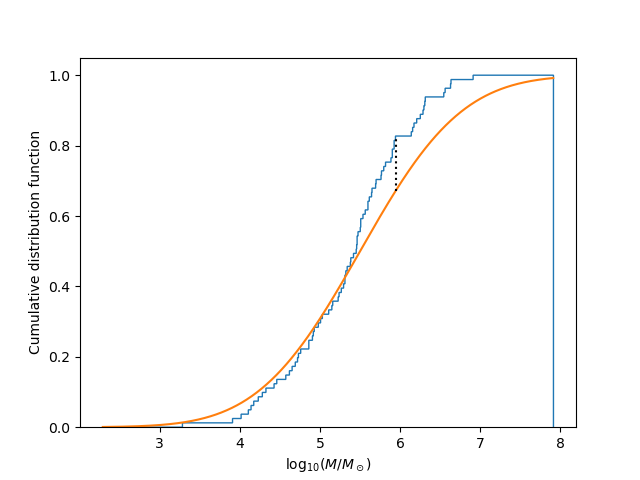

In [15]:
bins = np.linspace(min(log_mass)-1, max(log_mass)+1, 1000)
xx = (bins[1:] + bins[:-1]) / 2.0

model_cdf = st.norm.cdf(xx, loc=model_mean, scale=model_std)
plt.figure()
sample_cdf, _, _ = plt.hist(log_mass, bins=bins, histtype="step", density=True, cumulative=1)
# np.histogram(log_mass, bins=xx, density=True, cumulative=1)

where_max_d = np.argmax(np.abs(model_cdf-sample_cdf))
D1, D2 = model_cdf[where_max_d], sample_cdf[where_max_d]
D = abs(D1 - D2)
plt.plot(xx, model_cdf)
plt.plot([xx[where_max_d]]*2, [D1, D2], "k:", label="D={:.4g}".format(D))
plt.xlabel(logm_label)
plt.ylabel("Cumulative distribution function")
plt.show()

In [16]:
# perform the K-S test
model_distribution = st.norm(model_mean, model_std)
statistic, pvalue = st.kstest(log_mass, model_distribution.cdf)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = 0.155
p-value   = 0.0371


# 5. Dependence/independence of random variables
Sometimes we want to test whether two quantities are correlated, or *(in)dependent*. This is useful for 
* confirming a model predicting that such a correlation exists
* predicting a quantity (e.g., 'y' from 'x')
* verify a monotonic relation between two quantities

# 5.1 Correlation test

One of the most important discovering in modern Astronomy and Cosmology, is the Hubble–Lemaître law. In 1929, Edwin Hubble discovered that the radial velocity and the distance of the galaxies are linearly correlated. Let's load the velocities and distance of all the galaxiy in the *Heraklion Extragalactic Cataloge* (HECATE; Kovlakas et al. 2021) with $B$-band magnitudes less than $13\ \mathrm{mag}$.

In [17]:
df = pd.read_csv("data/v_d_bt13.csv")
df

,OBJNAME,V,D
0,PGC000143,-111.2,0.9758
1,NGC7814,1053.0,14.3859
2,NGC7817,2309.4,27.6788
3,NGC0023,4561.4,54.5081
4,NGC0024,553.3,7.6223
...,...,...,...
1259,NGC7796,3339.9,50.7237
1260,NGC7798,2403.4,32.6588
1261,PGC088608,225.8,0.0893
1262,NGC1201,1677.9,19.5246


Using the variable `N_GALAXIES` below, we can change the number of data points we will use.

FIT RESULTS:
    slope          : 83.28 +/-   2.08
    intercept      : -126.61 +/-  77.06
    corr. coeff. R : +0.997521
    R squared      : 0.995049
    p-value        : 1.64624e-10


<IPython.core.display.Javascript object>


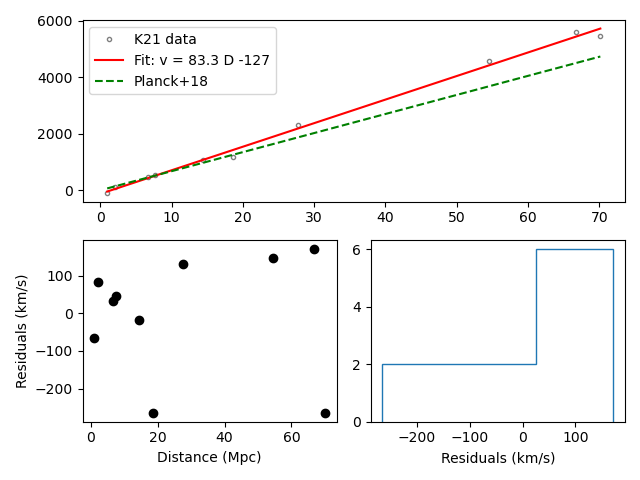

In [18]:
v, d = df["V"], df["D"]

N_GALAXIES = 10   # set to None to use everything
if N_GALAXIES is not None:
    v, d = v[:N_GALAXIES], d[:N_GALAXIES]

res = st.linregress(x=d, y=v)

slope, intercept, rvalue, pvalue, slope_stderr = res
intercept_stderr = res.intercept_stderr                # for compatibility this value is extract like this

print("FIT RESULTS:")
print("    slope          : {:.2f} +/- {:6.2f}".format(slope, slope_stderr))
print("    intercept      : {:.2f} +/- {:6.2f}".format(intercept, intercept_stderr))
print("    corr. coeff. R : {:+.6f}".format(rvalue))
print("    R squared      : {:.6f}".format(rvalue**2.0))
print("    p-value        : {:.6g}".format(pvalue))

x_plot = np.array([min(d), max(d)])
y_plot = slope * x_plot + intercept

yy_planck = 67.4 * x_plot

plt.figure()
plt.subplot(211)
plt.plot(d, v, "k.", mfc="none", alpha=0.5, label="K21 data")
plt.plot(x_plot, y_plot, "r-", label="Fit: v = {:.3g} D {:+.3g}".format(slope, intercept))
plt.plot(x_plot, yy_planck, "g--", label="Planck+18")
plt.legend(loc="upper left")

residuals = v - (slope * d + intercept)
# plt.figure(constrained_layout=True)
plt.subplot(223)
plt.plot(d, residuals, "ko")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Residuals (km/s)")
plt.subplot(224)
plt.hist(residuals, bins="fd", histtype="step")
plt.xlabel("Residuals (km/s)")
plt.tight_layout()
plt.show()

Pearson correlation coefficient:

$$ \large \rho = \dfrac{\mathrm{cov}\left(X, Y\right)}{\sigma_X \sigma_Y} $$

For a sample:

$$ \large
    r = \dfrac{
              \sum\limits_{i=1}^{n}\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)
              }
              {
              \sqrt{
              \sum\limits_{i=1}^{n}\left(x_i - \bar{x}\right)^2
              \sum\limits_{i=1}^{n}\left(y_i - \bar{y}\right)^2
              }
              }
$$

- 0: no correlation. 
- 1: perfect correlation
- -1: perfect anti-correlation.

The square of $r$, usually refered as **R-squared** in the literature, is *percentage of explained variance through the linear correlation*.

For the $p$-value returned from the `linregress` function, `scipy` documentation reports:
> The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses

Therfore, a $p$-value smaller than our significance level, means that **we reject the hypothesis that the slope is 0**, which can be rephrased as **we cannot reject the hypothesis that there is a linear correlation**.

*Warning: this doesn't mean that we accept that the correlation is linear. It could very well be a higher-degree polynomial that for small distances is very close to a simple line!* 

# 5.2 Monotonicity check

Let's imagine that the Hubble's law is non-linear. What would happen with our linear correlation and hypothesis test?

FIT RESULTS:
    slope          : 5.02 +/-   1.46
    intercept      : 1376.73 +/-  46.09
    corr. coeff. R : +0.545020
    R squared      : 0.297047
    p-value        : 0.00184311


<IPython.core.display.Javascript object>


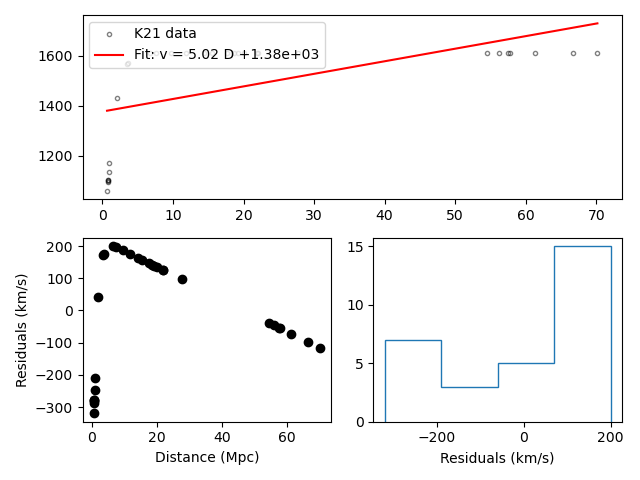

In [19]:
v = df["V"]
d = df["D"]

N_GALAXIES = 30

v, d = v[:N_GALAXIES], d[:N_GALAXIES]

v = np.mean(v) / (1.0 + np.exp(-d / 1))

res = st.linregress(x=d, y=v)

slope, intercept, rvalue, pvalue, slope_stderr = res
intercept_stderr = res.intercept_stderr                # for compatibility this value is extract like this

print("FIT RESULTS:")
print("    slope          : {:.2f} +/- {:6.2f}".format(slope, slope_stderr))
print("    intercept      : {:.2f} +/- {:6.2f}".format(intercept, intercept_stderr))
print("    corr. coeff. R : {:+.6f}".format(rvalue))
print("    R squared      : {:.6f}".format(rvalue**2.0))
print("    p-value        : {:.6g}".format(pvalue))

x_plot = np.array([min(d), max(d)])
y_plot = slope * x_plot + intercept

yy_planck = 67.4 * x_plot

plt.figure()
plt.subplot(211)
plt.plot(d, v, "k.", mfc="none", alpha=0.5, label="K21 data")
plt.plot(x_plot, y_plot, "r-", label="Fit: v = {:.3g} D {:+.3g}".format(slope, intercept))
plt.legend(loc="upper left")

residuals = v - (slope * d + intercept)
# plt.figure(constrained_layout=True)
plt.subplot(223)
plt.plot(d, residuals, "ko")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Residuals (km/s)")
plt.subplot(224)
plt.hist(residuals, bins="fd", histtype="step")
plt.xlabel("Residuals (km/s)")
plt.tight_layout()
plt.show()

A very small $p$-value! We can reject the hypothesis of a zero-slope, assuming the linear model! But it's clearly not linear. This is reflected by the fact that the R-squared value is small - the variance in the data is not explained - there is something missing. Either a more accurate model, or other dimensions.

However, in such cases, if we are interested in the fact that $y$ inceases with $x$, we can perform a **monotonicity test**. There are two widely used monotonicity checks through the *Spearman rank correlation coefficient* $r_s$ and the *Kendall rank correlation coefficient* $\tau$ often referred as *Kendall's $\tau$*. Their power relies on the fact that they are *non-parametric* and therefore they do not rely on an assumed model describing the data.

For $r_s$ and $\tau$:
- 0: $x$ and $y$ are independent
- 1: strictly increasing
- -1: strictly decreasing

In [20]:
# report correlation tests' p-values
r, pvalue = st.pearsonr(d, v)
print("PEARSON  : r = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))
r, pvalue = st.spearmanr(d, v)
print("SPEARMAN : r = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))
r, pvalue = st.kendalltau(d, v)
print("KENDALL  : t = {:.3f}  |  p-value = {:.3g}".format(r, pvalue))

PEARSON  : r = 0.545  |  p-value = 0.00184
SPEARMAN : r = 0.994  |  p-value = 3.26e-28
KENDALL  : t = 0.976  |  p-value = 1.02e-13


# 6. Custom test using random sampling

Sometimes, the existing hypothesis tests cannot be used in our study. Possible reasons:
- structure of the data: we have error bars, multiple dimensions, etc.
- the sample size is too small or large, and is not covered by existing tabulations of critical values
- the null hypothesis is not standard

For example, we have three measurements of $x$ and $y$-values with independent uncertainties on both axes, and we want to check whether $y=x$. We do not have intercept in our case, so Pearson's $r$ cannot be used. Also, standard tests rarely account for uncertainties.

<IPython.core.display.Javascript object>


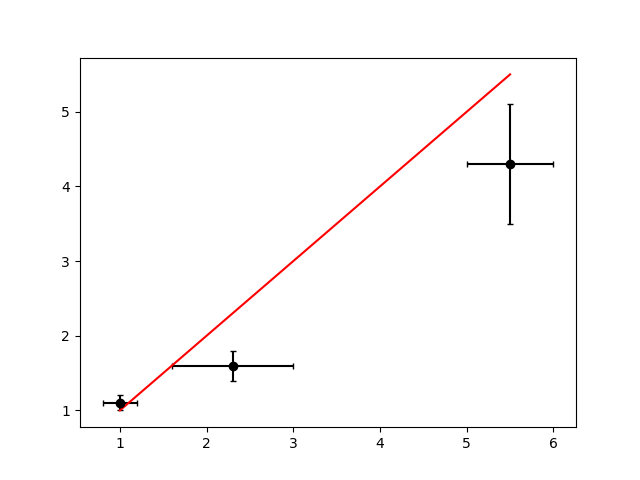

In [21]:
x = [1.0, 2.3, 5.5]
x_err = [0.2, 0.7, 0.5]
y = [1.1, 1.6, 4.3]
y_err = [0.1, 0.2, 0.8]

xx = [min(x), max(x)]

plt.figure()
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt="ko", capsize=2)
plt.plot(xx, xx, "r-")
plt.show()

Using random sampling we can perturb the $x$ and $y$ values assuming normal distributions.

We can compute the slope of each iteration using the formula:

$$ \large \hat{a} = \dfrac{ \sum\limits_{i=1}^{n} y_i x_i }{ \sum\limits_{i=1}^{n} x_i^2 } $$

Using the slope as the statistic, we can construct empirically the distribution of the statistic. By taking the perecentiles that correspond to our significance level, we can find the critical values.

<IPython.core.display.Javascript object>


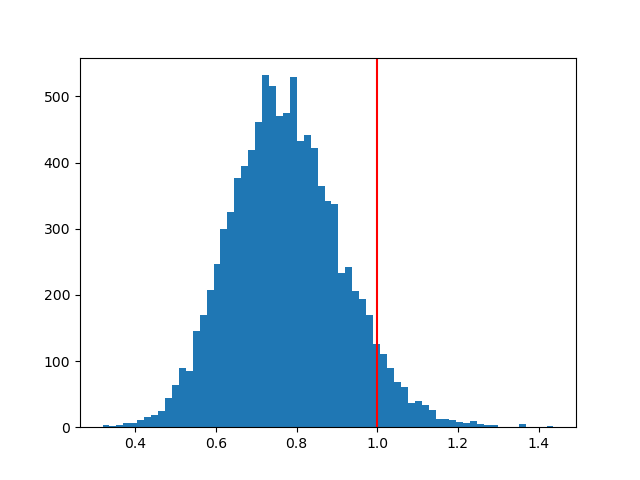

In [22]:
n_iterations = 10000
slopes = []

for i in range(n_iterations):
    x_sample = np.random.normal(x, x_err)
    y_sample = np.random.normal(y, y_err)
    
    slope = np.sum(y_sample * x_sample) / np.sum(x_sample ** 2.0)
    slopes.append(slope)
    
plt.figure()
plt.hist(slopes, bins="fd")
plt.axvline(1.0, color="r")
plt.show()

In [23]:
significance_level = 0.05
percentage_lo = 100.0 * (significance_level / 2.0)
percentage_hi = 100.0 * (1.0 - significance_level / 2.0)
critical_values = np.percentile(slopes, [percentage_lo, percentage_hi])
print("Critical values for sig.lev. =", significance_level, ":", critical_values)

model_slope = 1.0

H0 = "the hypothesis that the slope is {}, with a significance level {}".format(model_slope, significance_level)
if critical_values[0] < model_slope < critical_values[1]:
    print("We cannot reject", H0)
else:
    print("We reject", H0)

Critical values for sig.lev. = 0.05 : [0.51760056 1.06489522]
We cannot reject the hypothesis that the slope is 1.0, with a significance level 0.05


Similarly, randomization tests are often used to test hypotheses. For example, if we have $(x_i, y_i)$ and we want to check whether they follow a specific structure (or model), we can permuate randomly the $x_i$ values and check the value of the statistic that reflects the agreement with the model.

# Common misconceptions: $R^2$ and $p$-values
- Often $p$-values are approximated for large samples, especially for non-parametric tests (e.g., Kendall-$\tau$ hypothesis test). *The absolute values are not important.*
- $p$ is not the probability of our data to be described by a given model! It describes a probability of rejecting a model assuming it is correct! 
- Having said that, we **cannot compare** $p$-values between different models (e.g., model comparison)! We can only perform independent hypothesis tests. The same holds with the *statistics* (e.g., $D$ in K-S test).
- In linear regression, only looking at the $p$-value or $R^2$ might be misleading.

![Keep calm...](images/keep_calm.jpg)

# References

[1]. Nantais et al. (2006). Nearby Spiral Globular Cluster Systems. I. Luminosity Functions. The Astronomical Journal, 131.

[2]. Kovlakas et al. (2021). The Heraklion Extragalactic Catalogue.

[3]. Planck Collaboration (2020). Planck 2018 results. VI. Cosmological parameters 